# MGT458 Group Project - Visualization

In [1]:
# this code allows us to have multiple outputs per cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# import packages we might need

import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# set the dimensions of dataframe outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# get file and put the first column as index
df = pd.read_csv('Hotel_Reservations.csv')
df = pd.read_csv('Hotel_Reservations.csv', index_col = 0)

In [5]:
# put the transformations (these were from our previous report)

df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
df['total_people'] = df['no_of_adults'] + df['no_of_children']
df['total_price'] = df['avg_price_per_room'] * df['total_nights']
cols = ["arrival_year","arrival_month","arrival_date"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

## 1. Boxplots
For the purpose of our analysis, we made our boxplots without the removal of outliers that we had identified in our previous report. This way, we can see if our analysis from our previous report was accurate.

Text(0.5, 0, 'Market segment type')

Text(0, 0.5, 'Average price per room')

Text(0.5, 1.0, 'Average Price per Room by Market Segment')

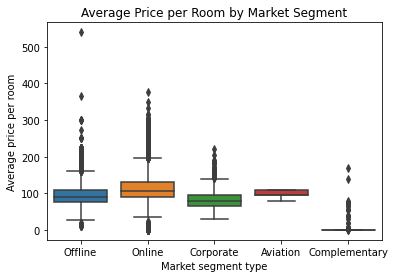

In [6]:
# average price per room by market segment

fig = sns.boxplot(x = 'market_segment_type', y = 'avg_price_per_room', data=df)
fig

# some formatting
plt.xlabel('Market segment type')
plt.ylabel('Average price per room', rotation = 90)
plt.title('Average Price per Room by Market Segment')

# saving the file
filename = 'Boxplot_Price_Segment.png'
plt.savefig(filename)

Text(0.5, 0, 'Booking status')

Text(0, 0.5, 'Average price per room')

Text(0.5, 1.0, 'Average Price per Room by Booking Status')

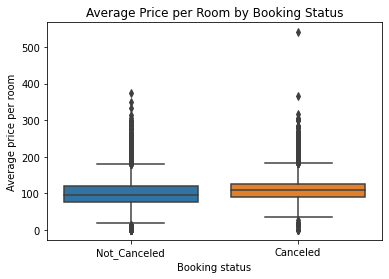

In [7]:
# average price per room by booking status

plot = sns.boxplot(x = 'booking_status', y = 'avg_price_per_room', data=df)
plot

# some formatting
plt.xlabel('Booking status')
plt.ylabel('Average price per room', rotation = 90)
plt.title('Average Price per Room by Booking Status')

# saving the file
filename = 'Boxplot_Price_Status.png'
plt.savefig(filename)

Text(0.5, 0, 'Booking status')

Text(0, 0.5, 'Lead time')

Text(0.5, 1.0, 'Lead Time by Booking Status')

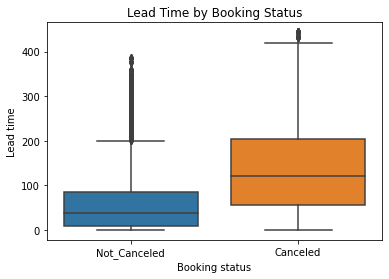

In [8]:
# lead time by booking status

plot = sns.boxplot(x = 'booking_status', y = 'lead_time', data=df)
plot

# some formatting
plt.xlabel('Booking status')
plt.ylabel('Lead time', rotation = 90)
plt.title('Lead Time by Booking Status')

# saving the file
filename = 'Boxplot_Lead_Status.png'
plt.savefig(filename)

Text(0.5, 0, 'Booking status')

Text(0, 0.5, 'Total nights')

Text(0.5, 1.0, 'Total Nights by Booking Status')

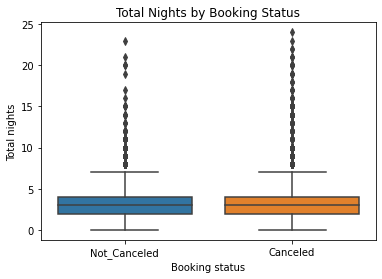

In [9]:
# total nights by booking status

plot = sns.boxplot(x = 'booking_status', y = 'total_nights', data=df)
plot

# some formatting
plt.xlabel('Booking status')
plt.ylabel('Total nights', rotation = 90)
plt.title('Total Nights by Booking Status')

# saving the file
filename = 'Boxplot_Nights_Status.png'
plt.savefig(filename)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4be78e710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4beca1668>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4be78e320>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe4beca1908>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4beca1588>],
 'means': []}

Text(0, 0.5, 'Number of previous cancellations')

Text(0.5, 1.0, 'Number of Previous Cancellations')

([<matplotlib.axis.XTick at 0x7fe4bed2a470>], [Text(0, 0, 'Whole data set')])

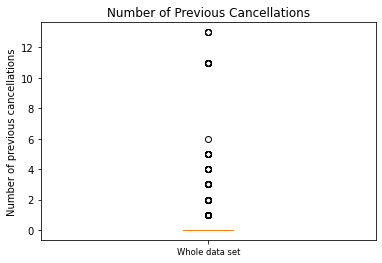

In [10]:
# number of previous cancellations

cancel = df.no_of_previous_cancellations
box = plt.boxplot(cancel)
box

# some formatting
plt.ylabel('Number of previous cancellations', rotation = 90)
plt.title('Number of Previous Cancellations')

# replacing the numbers for months with the actual month name
tick_loc = [1]
tick_lab = ['Whole data set']
plt.xticks(tick_loc, tick_lab, fontsize = 'small')

# saving the file
filename = 'Boxplot_Previous_Cancellations.png'
plt.savefig(filename)

Since we have now finished our boxplots, we can remove the outliers for the other visualization techniques.

In [11]:
# removing outliers
df["no_of_adults"] = np.where(df["no_of_adults"] > 3, 2, df["no_of_adults"])
df["no_of_children"] = np.where(df["no_of_children"] > 2, 0, df["no_of_children"])
df["no_of_weekend_nights"] = np.where(df["no_of_weekend_nights"] > 5, 1, df["no_of_weekend_nights"])
df["no_of_week_nights"] = np.where(df["no_of_week_nights"] > 11, 2, df["no_of_week_nights"])
df["required_car_parking_space"] = np.where(df["required_car_parking_space"] > 1, 0, df["required_car_parking_space"])
df["lead_time"] = np.where(df["lead_time"] > 433, 57, df["lead_time"])
df["no_of_previous_cancellations"] = np.where(df["no_of_previous_cancellations"] > 5, 0, df["no_of_previous_cancellations"])
df["no_of_previous_bookings_not_canceled"] = np.where(df["no_of_previous_bookings_not_canceled"] > 28, 0, df["no_of_previous_bookings_not_canceled"])
df["avg_price_per_room"] = np.where(df["avg_price_per_room"] > 265.31944, 99.45, df["avg_price_per_room"])
df["no_of_special_requests"] = np.where(df["no_of_special_requests"] > 4, 0, df["no_of_special_requests"])

## 2. Line Charts

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Number of nights')

Text(0.5, 1.0, 'Average Number of Nights by Month')

([<matplotlib.axis.XTick at 0x7fe4be7f1828>,
 [Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September'),
  Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December')])

Text(5, 3.2, 'max')

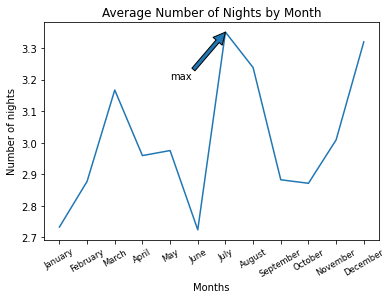

In [12]:
# total nights by month

by_month = df.groupby(['arrival_month']).mean()

nights = by_month.total_nights
line = plt.plot(nights)
line

# some formatting
plt.xlabel('Months')
plt.ylabel('Number of nights', rotation = 90)
plt.title('Average Number of Nights by Month')

# replacing the numbers for months with the actual month name
tick_loc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tick_lab = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_loc, tick_lab, rotation = 30, fontsize = 'small')

# add an arrow to show the maximum
plt.annotate('max',xy=(7,3.35),xytext=(5,3.2),arrowprops={})

# saving the file
filename = 'Line_Nights.png'
plt.savefig(filename)

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Average price per room')

Text(0.5, 1.0, 'Average Price per Room by Month')

([<matplotlib.axis.XTick at 0x7fe4be4aff60>,
 [Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September'),
  Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December')])

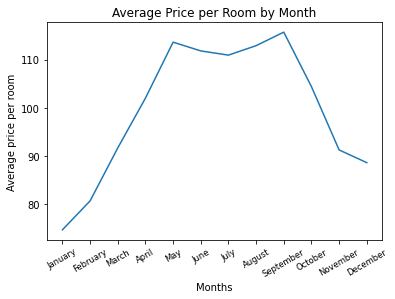

In [13]:
# room average price by month

price = by_month.avg_price_per_room
line1 = plt.plot(price)
line1

# some formatting
plt.xlabel('Months')
plt.ylabel('Average price per room', rotation = 90)
plt.title('Average Price per Room by Month')

# replacing the numbers for months with the actual month name
tick_loc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tick_lab = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_loc, tick_lab, rotation = 30, fontsize = 'small')

# saving the file
filename = 'Line_Price.png'
plt.savefig(filename)

Text(0.5, 0, 'Months')

Text(0, 0.5, 'Number of nights')

Text(0.5, 1.0, 'Average Number of Nights by Month and Market Segment')

([<matplotlib.axis.XTick at 0x7fe4be494ba8>,
 [Text(0, 0, 'January'),
  Text(0, 0, 'February'),
  Text(0, 0, 'March'),
  Text(0, 0, 'April'),
  Text(0, 0, 'May'),
  Text(0, 0, 'June'),
  Text(0, 0, 'July'),
  Text(0, 0, 'August'),
  Text(0, 0, 'September'),
  Text(0, 0, 'October'),
  Text(0, 0, 'November'),
  Text(0, 0, 'December')])

Text(3, 6, 'peak')

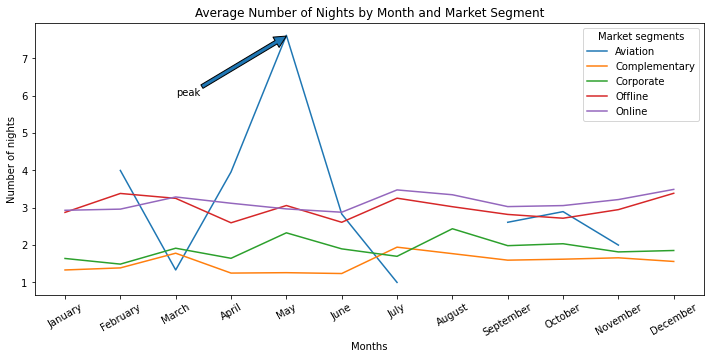

In [14]:
# average number of nights by month and market segment

fig, ax = plt.subplots(figsize=(12,5))
df.groupby(['arrival_month','market_segment_type']).mean()['total_nights'].unstack().plot(ax=ax)

# some formatting
plt.xlabel('Months')
plt.ylabel('Number of nights', rotation = 90)
plt.title('Average Number of Nights by Month and Market Segment')
plt.legend(title = 'Market segments')

# replacing the numbers for months with the actual month name
tick_loc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tick_lab = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_loc, tick_lab, rotation = 30, fontsize = 'medium')

# add an arrow to show the peak
plt.annotate('peak', xy=(5, 7.6), xytext=(3, 6), arrowprops={})

# saving the file
filename = 'Line_Nights_Segment.png'
plt.savefig(filename)

## 3. Histogram

Text(0.5, 1.0, 'Histogram of the Room Type')

Text(0.5, 0, 'Frequency')

Text(0, 0.5, 'Room Type')

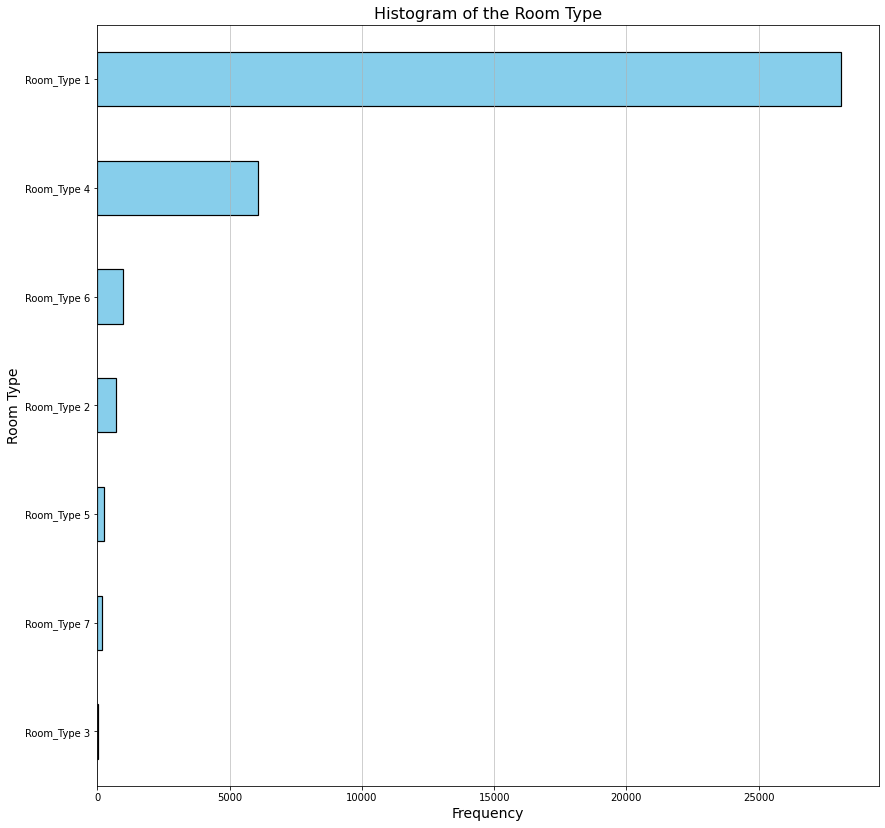

<Figure size 432x288 with 0 Axes>

In [15]:
# room type

data = df.sort_values(by = "booking_status")

fig, ax = plt.subplots(figsize=(14, 14))

# calculate value counts and sort by frequency
sorted_counts = data["room_type_reserved"].value_counts().sort_values(ascending=True)

# create a bar plot from the sorted Series
sorted_counts.plot(kind='barh', ax=ax, color='skyblue', edgecolor='black', linewidth=1.2)

ax.set_title("Histogram of the Room Type", fontsize=16)
ax.set_xlabel("Frequency", fontsize=14)
ax.set_ylabel("Room Type", fontsize=14)
ax.grid(axis='x', alpha=0.75)

plt.show()

# saving the file
filename = 'Histogram_Room_Type.png'
plt.savefig(filename)

## 4. Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4be422748>,
      dtype=object)

Text(0.5, 0.98, 'Scatter Matrix of All Variables')

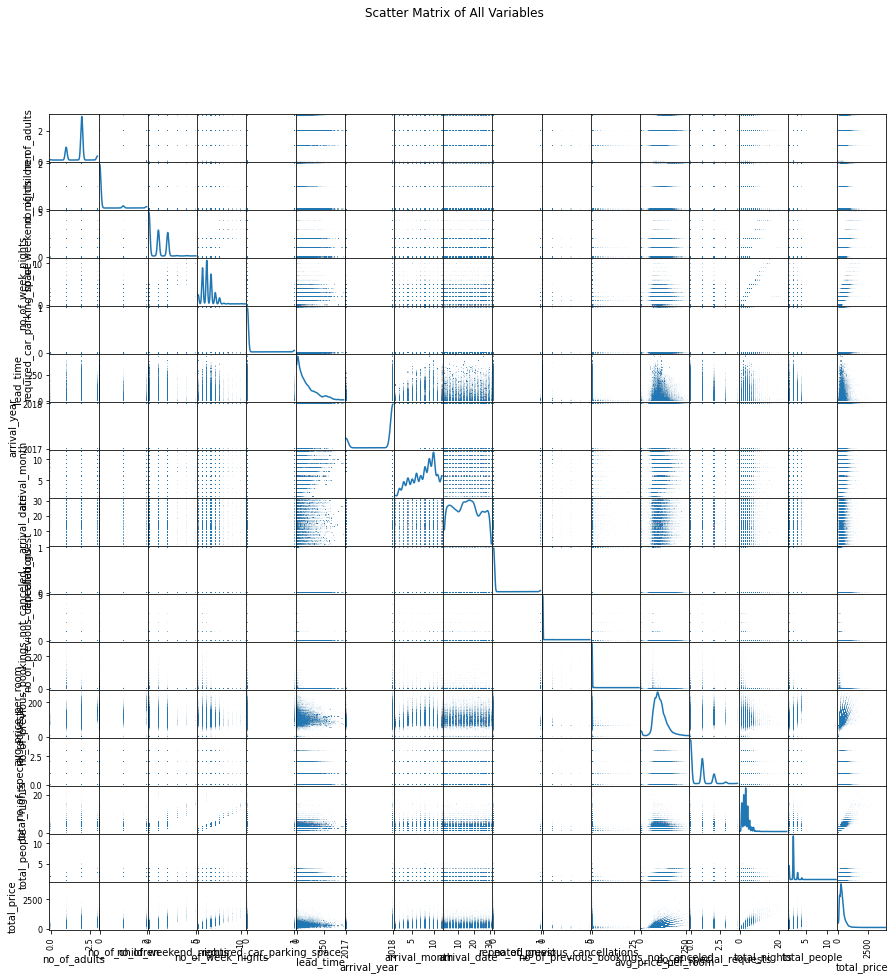

<Figure size 432x288 with 0 Axes>

In [16]:
# the following code will produce a scatter matrix

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15, 15),
               marker=".",
               s=0.2,
               diagonal="kde")

plt.suptitle("Scatter Matrix of All Variables")
plt.show()

# saving the file
filename = 'Scatter_Matrix.png'
plt.savefig(filename)

## 5. Scatter Plot

Text(0.5, 0, 'Average price per room')

Text(0, 0.5, 'Lead time when booking')

Text(0.5, 1.0, 'Scatter Plot of Booking Related to Average Price and Lead Time')

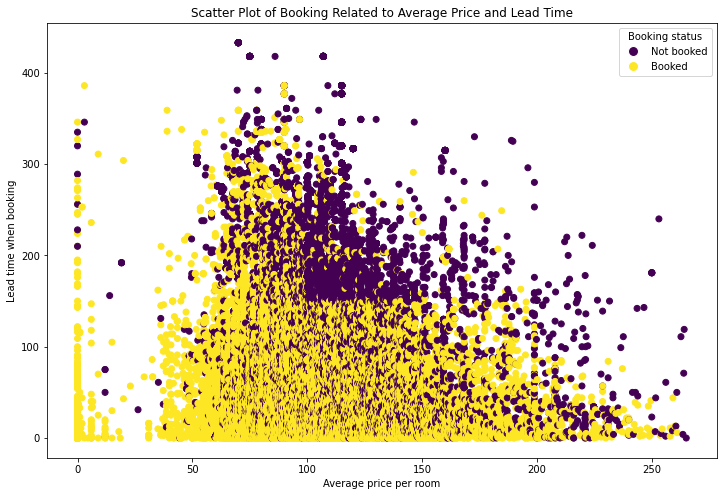

<Figure size 432x288 with 0 Axes>

In [17]:
# booking status by average price and lead time

datalead = df.sort_values(by="avg_price_per_room")

# create a dictionary with color codes and their meanings
color_dict = {0: 'Not booked', 1: 'Booked'}

# scatter plot
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size here
scatter = ax.scatter(x=datalead["avg_price_per_room"], y=datalead["lead_time"],
                     c=datalead["booking_status"].astype("category").cat.codes)

# label axes and title
plt.xlabel("Average price per room")
plt.ylabel("Lead time when booking")
plt.title("Scatter Plot of Booking Related to Average Price and Lead Time")

# create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=color_dict[i],
                             markerfacecolor=plt.cm.viridis(i / (len(color_dict) - 1)), markersize=10)
                  for i in range(len(color_dict))]

# add legend to the plot
ax.legend(handles=legend_handles, title='Booking status', loc='best')

plt.show()

# saving the file
filename = 'Histogram_Price_Lead.png'
plt.savefig(filename)

## 6. Figure with multiple subplots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe48b6d9f98>,
      dtype=object)

Text(0.5, 0.98, 'Histogram for All Numerical Variables')

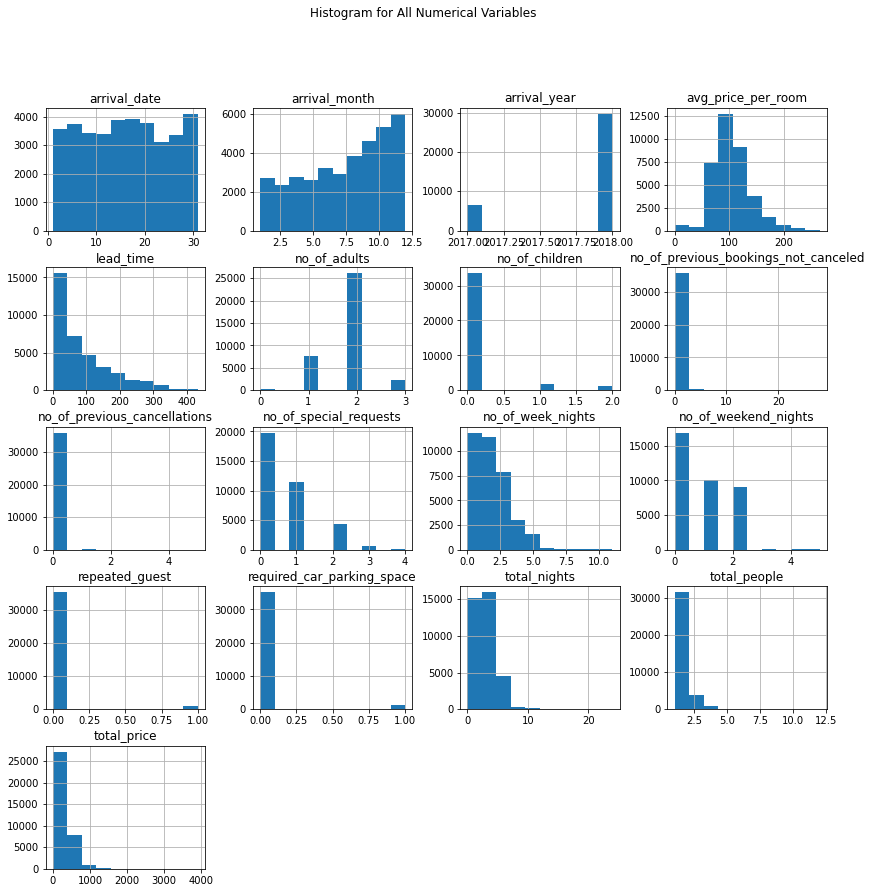

<Figure size 432x288 with 0 Axes>

In [18]:
# the following code will produce a figure with multiple subplots

df.hist(bins=10, figsize=(14, 14))
plt.suptitle("Histogram for All Numerical Variables")
plt.show()

# saving the file
filename = 'Subplots.png'
plt.savefig(filename)

## 7. Bar Chart

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 0, 'Market segment')

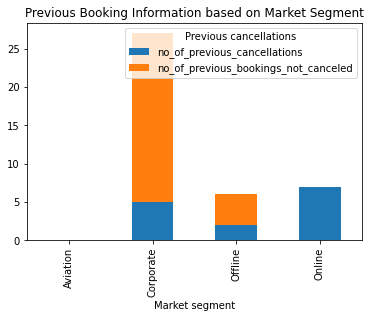

In [19]:
# bar chart previous cancellations by market segment

df = df.assign(booking_status_original=df['booking_status'])
df.booking_status_original[df.booking_status_original==0] = 'Not Canceled'
df.booking_status_original[df.booking_status_original==1] = "Canceled"
bookinggroups = df.groupby('booking_status_original')

canceledbooking = bookinggroups.get_group('Canceled').sort_values('no_of_previous_cancellations', ascending = True)

bookingsonly = canceledbooking[['market_segment_type', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']]

segmentsort2 = bookingsonly.groupby(['market_segment_type']).sum()
plotbookings = segmentsort2.plot(kind='bar', stacked=True, title="Previous Booking Information based on Market Segment")

# formatting
plt.legend(title = 'Previous cancellations')
plt.xlabel('Market segment')

# saving the file
filename = 'Bar_Cancel.png'
plt.savefig(filename)

Text(0.5, 0, 'Market segment')

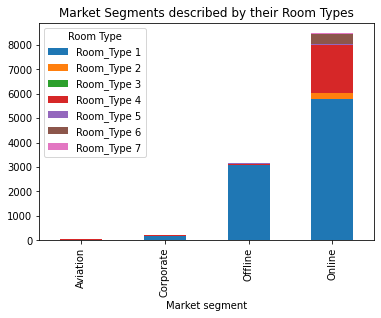

In [20]:
# market segment by room type
roomtype = canceledbooking[['market_segment_type', 'room_type_reserved']]
roomsort = roomtype.groupby(['market_segment_type', 'room_type_reserved'])['room_type_reserved'].count()

plotrooms = roomsort.unstack().plot(kind='bar', stacked=True, title="Market Segments described by their Room Types")

# formatting
plt.legend(title = 'Room Type')
plt.xlabel('Market segment')

# saving the file
filename = 'Bar_Room_Segment.png'
plt.savefig(filename)

Text(0.5, 0, 'Room type reserved')

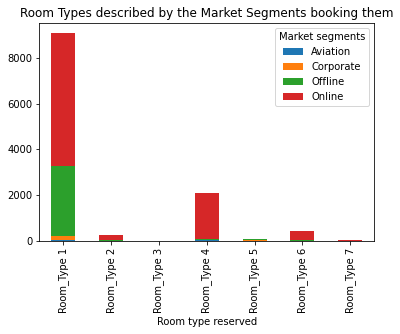

In [21]:
# room type by market segment

roomsort1 = roomtype.groupby(['room_type_reserved', 'market_segment_type'])['market_segment_type'].count()

plotrooms1 = roomsort1.unstack().plot(kind='bar', stacked=True, title="Room Types described by the Market Segments booking them")

# formatting
plt.legend(title = 'Market segments')
plt.xlabel('Room type reserved')

# saving the file
filename = 'Bar_Segment_Room.png'
plt.savefig(filename)